# Import 

In [1]:
# 3d library
import open3d as o3d

In [2]:
# image elaboration libraries

#!pip install Pillow 
#!pip install imageio
#!pip install cv2-plt-imshow

from imageio import imread
from imageio import imwrite
from PIL import Image

import cv2
import matplotlib.pyplot as plt
from cv2_plt_imshow import cv2_plt_imshow, plt_format

In [3]:
# others
import numpy as np
import os
import random as myrand

from tqdm.notebook import tqdm# progress bar
import sys
from time import time 
import copy

In [4]:
delimiter = ', ' 
myrand.seed(42)
dash = '-'*80

In [5]:
from datetime import date
from datetime import datetime
import pickle as pkl

# os and directories

In [6]:
from sys import platform
platform

'darwin'

In [7]:
os.chdir('/Users/ariannataormina/Documents/GitHub/02507-Project_work_Image_Analysis_and_Computer_Graphics/')
cwd = os.getcwd()
cwd

'/Users/ariannataormina/Documents/GitHub/02507-Project_work_Image_Analysis_and_Computer_Graphics'

In [8]:
if platform == "linux" or platform == "linux2":
    # linux
    print ("linux to be implemented")
elif platform == "darwin":
    # OS X
    ROOT= cwd +"/data" #mac
    os.chdir(ROOT)
    os.listdir(ROOT)
    !ls {ROOT}
elif platform == "win32":
    # Windows
    ROOT='ARI_HD:\\' #w10
    os.chdir(ROOT)
    os.listdir(ROOT)
    !dir {ROOT} 

0601-stitch_19-20.pcd
0601-transformation_result_icp.pkl
0601-transformation_result_icp_safe_copy.pkl
07012021-10h34m00s-stitch_0-20.pcd
07012021-10h34m00s-stitch_19-20.pcd
07012021-10h34m00s-transformation_result_icp.pkl
07012021-10h58m33s-stitch_19-20.pcd
07012021-10h58m33s-transformation_result_icp.pkl
07012021-11h17m33s-transformation_result_ransac.pkl
07012021-11h21m24s-transformation_result_icp.pkl
07012021-11h21m24s-transformation_result_ransac.pkl
07012021-11h29m21s-transformation_result_icp.pkl
07012021-11h29m21s-transformation_result_ransac.pkl
07012021-11h41m41s-transformation_result_icp.pkl
07012021-11h41m41s-transformation_result_ransac.pkl
07012021-12h18m38s-transformation_result_icppc_0_20-pc_19_20.pkl
07012021-12h18m38s-transformation_result_ransacpc_0_20-pc_19_20.pkl
07012021-14h17m45s-stitch_07012021-14h17m45s-stitch_pc_18_21.pcd.pcd
07012021-14h17m45s-transformation_result_icp-pc_18_21.pkl
07012021-16h40m24s-transformation_result_ran-tooth_1_in_up.pkl
07012021-16h40m

In [9]:
img_folder = ROOT +"/imgfolder"
ply_folder = ROOT +"/plyfolder"

In [10]:
!ls {img_folder}

image0.png  image05.png image10.png image15.png image20.png image25.png
image01.png image06.png image11.png image16.png image21.png image26.png
image02.png image07.png image12.png image17.png image22.png image27.png
image03.png image08.png image13.png image18.png image23.png image28.png
image04.png image09.png image14.png image19.png image24.png image29.png


In [11]:
!ls {ply_folder}

points0.ply  points05.ply points10.ply points15.ply points20.ply points25.ply
points01.ply points06.ply points11.ply points16.ply points21.ply points26.ply
points02.ply points07.ply points12.ply points17.ply points22.ply points27.ply
points03.ply points08.ply points13.ply points18.ply points23.ply points28.ply
points04.ply points09.ply points14.ply points19.ply points24.ply points29.ply


In [12]:
all_images = sorted(os.listdir(img_folder))
all_ply = sorted(os.listdir(ply_folder))

In [13]:
all_paths_images = [img_folder+"/"+all_images[idx] for idx in range(len(all_images))]
all_paths_ply = [ply_folder+"/"+all_ply[idx] for idx in range(len(all_ply))]

In [14]:
img_folder+"/"+all_images[0]

'/Users/ariannataormina/Documents/GitHub/02507-Project_work_Image_Analysis_and_Computer_Graphics/data/imgfolder/image0.png'

# Sort sequences appropriately

Given the initial 10 teeth: 
- external images are sorted as 0 to 9
- internal images are sorted as 9 to 0
- upper images are sorted as 0 to 9

need to reverse the order of internal images and ply


In [15]:
num_teeth = 10
external_img = [cv2.imread(path) for path in all_paths_images[:num_teeth]]
internal_img = [cv2.imread(path) for path in all_paths_images[num_teeth:2*num_teeth]]
upper_img = [cv2.imread(path) for path in all_paths_images[-num_teeth:]]

In [16]:
# reverse in place the internal ones
internal_img.reverse()

# plot tooth

In [17]:
t = 1

In [18]:
def display_one_tooth(images, toothnum = 0, rows = 1, cols=3, print_suptitle = False, mysuptitle = ""):
    fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(30, 30))
    for i in range(rows):
        for j in range(cols):
            axes[i][j].imshow(plt_format(images[j]))
            #axes[i][j].set_xlabel("tooth_{}".format(toothnum))
            #axes[i][j].axis('off')
    
    cols_title = ['{} View'.format(col) for col in ['External', 'Internal', 'Upper']]
    for ax, c in zip(axes[0], cols_title):
        ax.set_title(c, rotation=0, fontsize=40)
        
    rows_title = ["Tooth_{}             ".format(toothnum)]
    for ax, r in zip(axes[:,0], rows_title):
        ax.set_ylabel(r, rotation=0, fontsize=40)
        
    if print_suptitle == True:
        fig.suptitle("{}".format(mysuptitle),fontsize=40)
    
    fig.tight_layout()    
    plt.show()

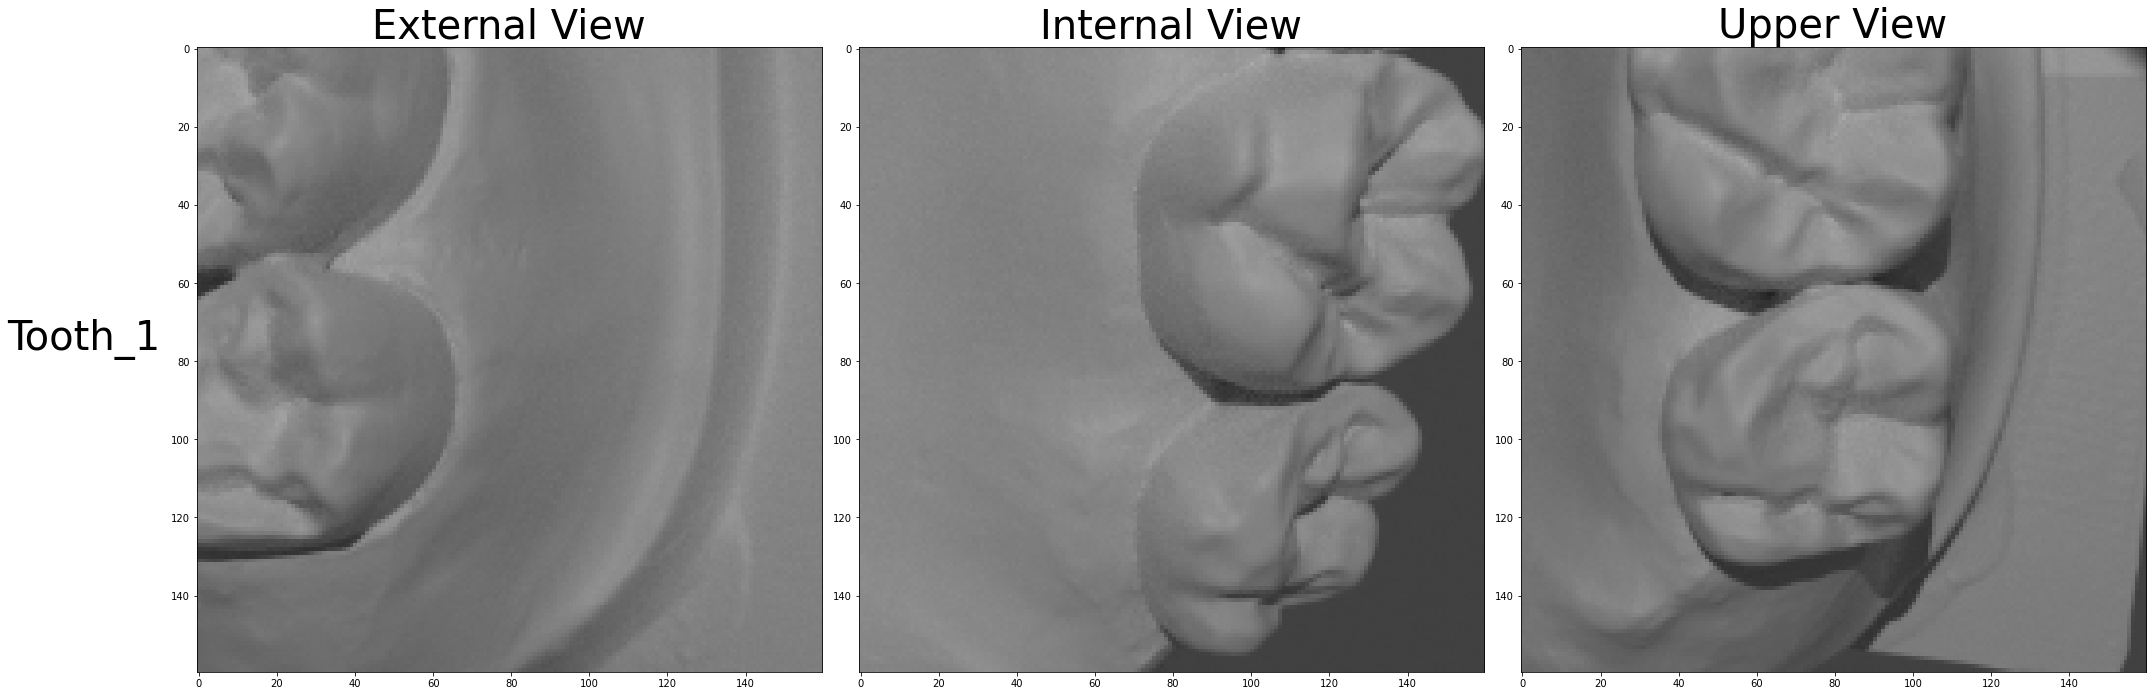

In [19]:
one_tooth_images= [external_img[t],internal_img[t],upper_img[t]]
display_one_tooth(one_tooth_images,toothnum = t, rows = 1, cols=len(one_tooth_images))


# plot multiple teeth

In [20]:
def display_multiple_teeth(images, T, rows = 1, cols=3, print_suptitle = False, mysuptitle = ""):
    
    fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(30, 30))
    for i in range(rows):
        for j in range(cols):
            axes[i][j].imshow(plt_format(images[j][i]))
            #axes[i][j].set_xlabel("tooth_{}".format(toothnum))
            #axes[i][j].axis('off')
    
    cols_title = ['{} View'.format(col) for col in ['External', 'Internal', 'Upper']]
    for ax, c in zip(axes[0], cols_title):
        ax.set_title(c, rotation=0, fontsize=40)
        
    rows_title = ["Tooth_{}             ".format(toothnum) for toothnum in list(range(T[0],T[1]))]
    for ax, r in zip(axes[:,0], rows_title):
        ax.set_ylabel(r, rotation=0, fontsize=40)
        
    if print_suptitle == True:
        fig.suptitle("{}".format(mysuptitle),fontsize=40)
    
    fig.tight_layout()    
    plt.show()

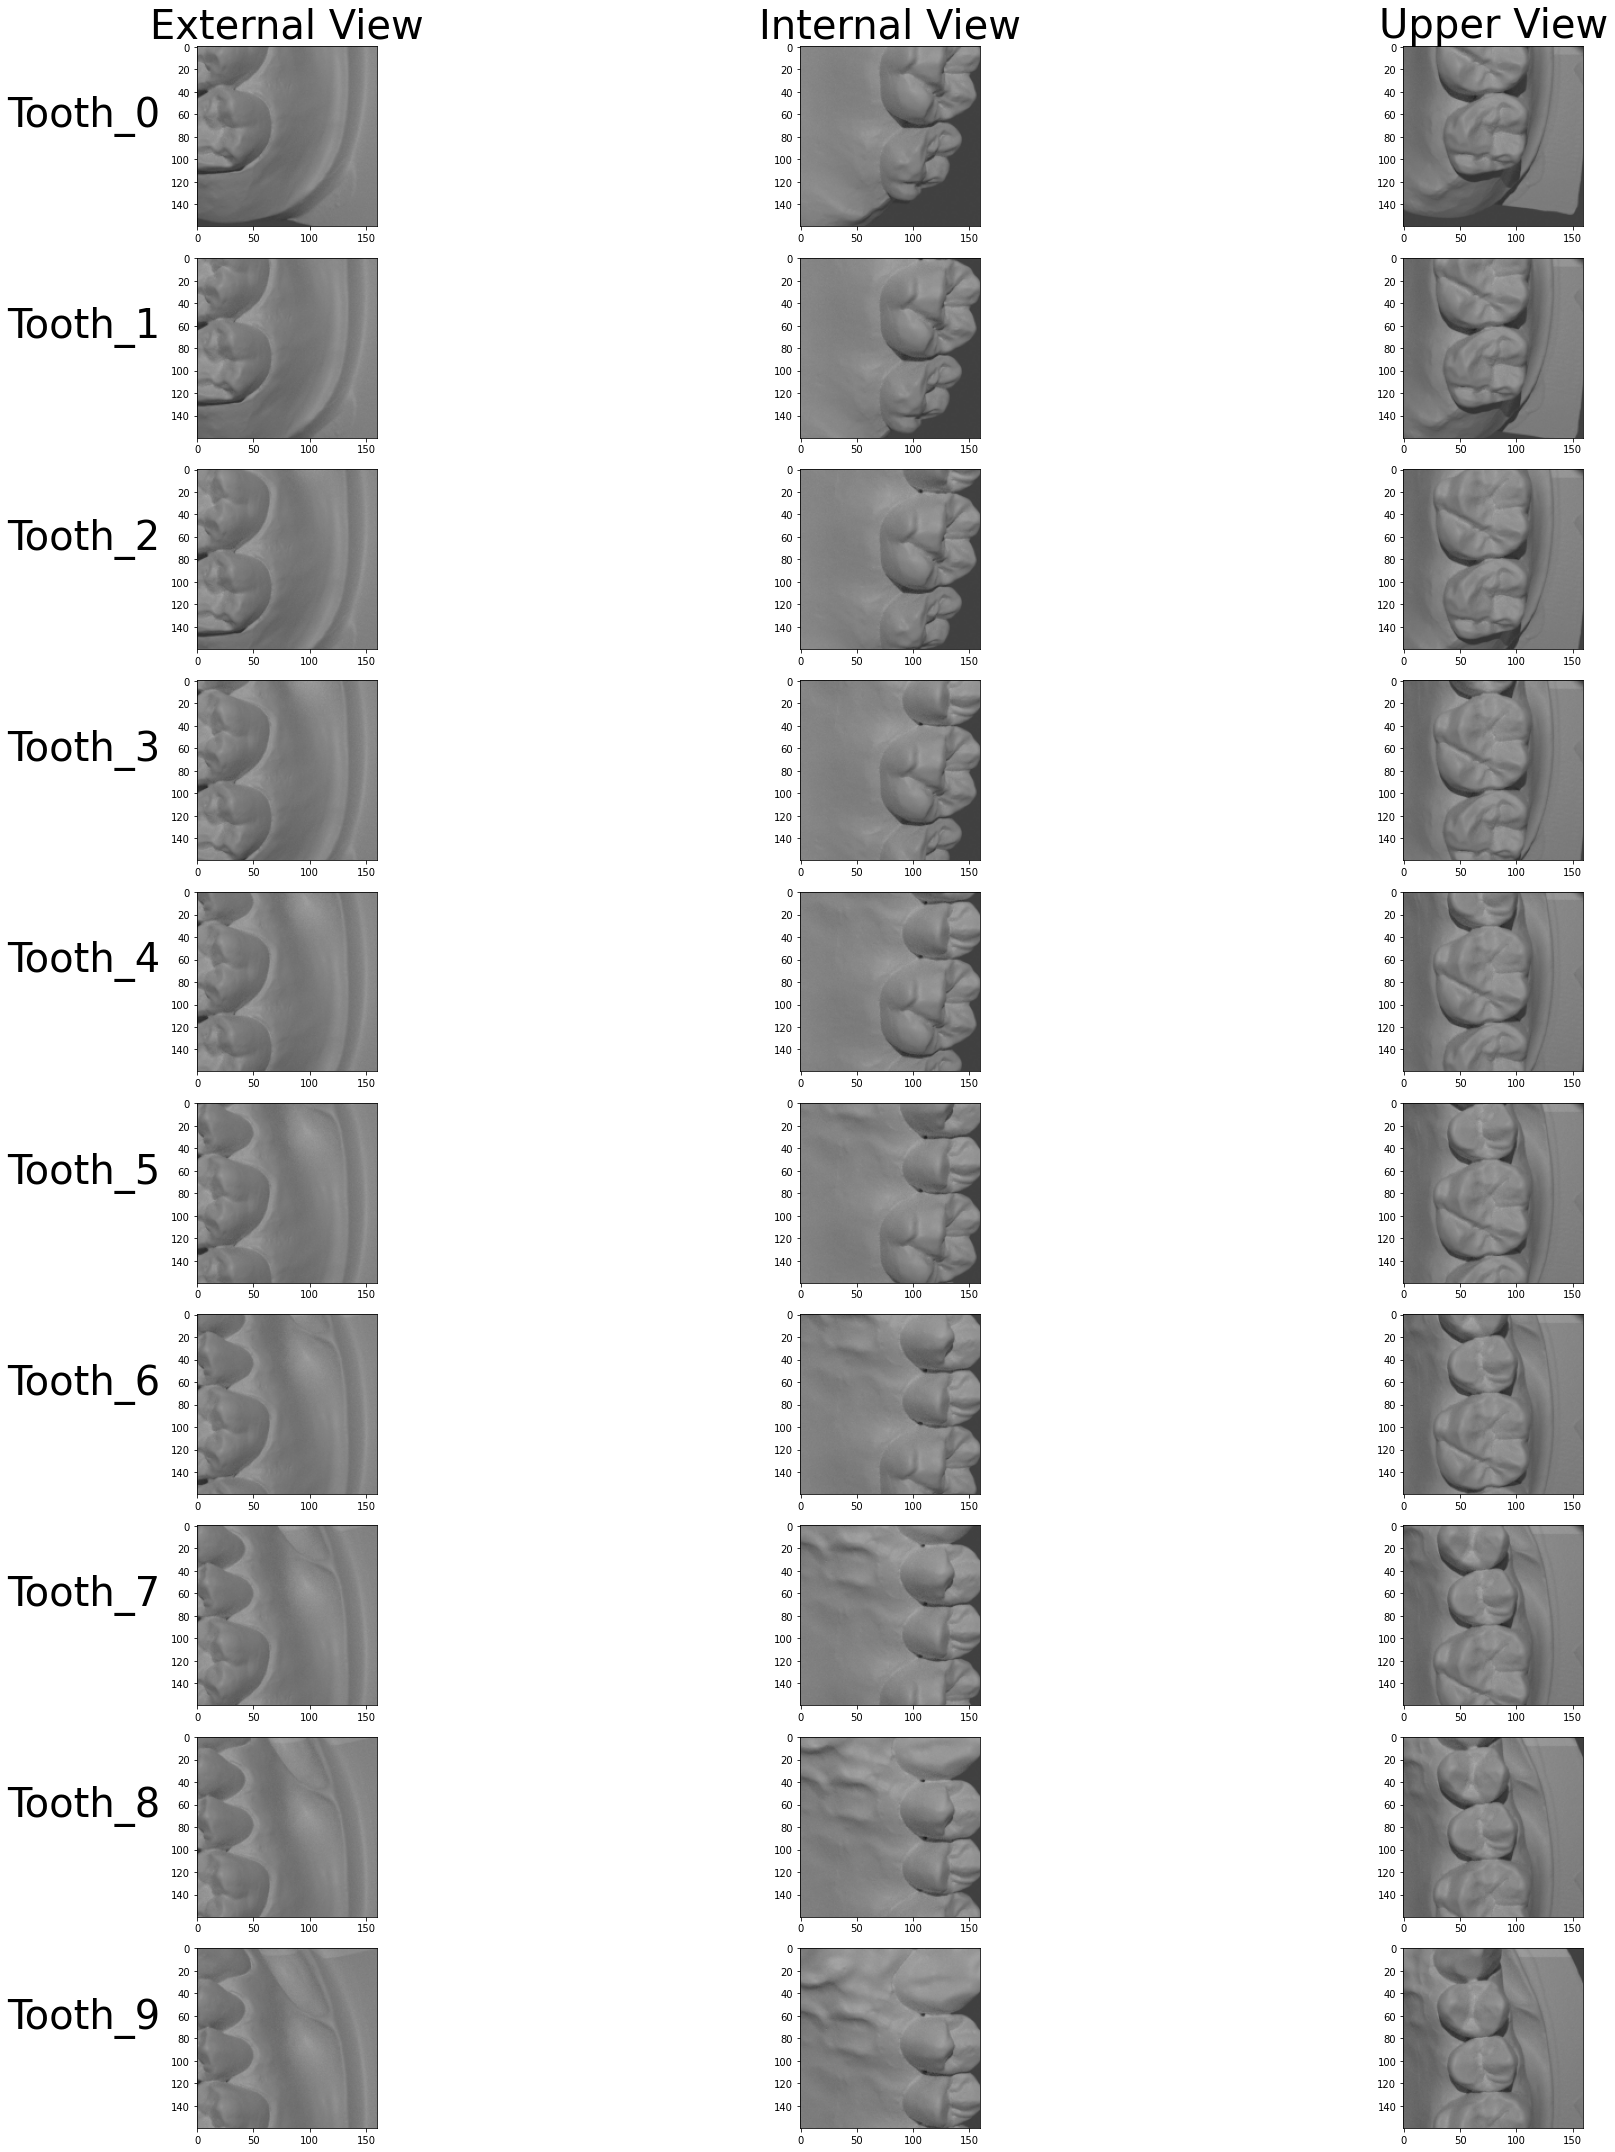

In [21]:
T = (0,10) # visualizing teeth from 5 to 9 
many_images= [external_img[T[0]:T[1]], internal_img[T[0]:T[1]], upper_img[T[0]:T[1]]] 
display_multiple_teeth(many_images,T, rows = len(external_img[T[0]:T[1]]), cols=len(many_images))

# Functions

In [79]:
%run "../Notebooks/Stitching_functions.ipynb"
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
test_function()

available functions
-visualize_tooth(t)
-draw_registration_result(source, target, transformation, title = ) 
-preprocess_point_cloud(pcd, voxel_size,pprint_statements = False)
-prepare_dataset(source,target,voxel_size, trans_init = None,mytitle = , print_statements = False)
-execute_global_registration(source_down, target_down, source_fpfh,target_fpfh, 
voxel_size,print_statements = False)
-refine_registration(source, target,source_fpfh, target_fpfh,voxel_size,
mytranformation = None,print_statements = False):
-stitch_two_point_clouds(source, target,mytitle,dt_string,voxel_size,
calculate_global = True,calculate_icp = True,trans_init = None,pprint_statements = False,save_statements = True,visualization_on = False)
-save_registration_result(source, target, transformation,title,save_result = True,visualize_result = False)


# Load Point Clouds

### load one point cloud 

In [24]:
#load one point cloud 
# http://www.open3d.org/docs/release/python_api/open3d.geometry.PointCloud.html
path = ply_folder+"/"+all_ply[20]
pcd = o3d.io.read_point_cloud(path)
print(pcd)
print(np.asarray(pcd.points))

PointCloud with 22217 points.
[[-10.407411 -10.407411  53.099034]
 [-10.271841 -10.401864  53.070736]
 [-10.138216 -10.39817   53.051888]
 ...
 [  3.092426  10.621811  54.878902]
 [  3.226965  10.622094  54.880359]
 [  3.361356  10.621886  54.879286]]


In [25]:
print(len(np.asarray(pcd.points)))

22217


### visualize point cloud

In [26]:
### visualize point cloud- opens a pop up window
o3d.visualization.draw_geometries([pcd])

### sets of Point Clouds

In [27]:
num_teeth = 10

external_ply = [o3d.io.read_point_cloud(path) for path in all_paths_ply[:num_teeth]]
internal_ply = [o3d.io.read_point_cloud(path) for path in all_paths_ply[num_teeth:2*num_teeth]]
upper_ply = [o3d.io.read_point_cloud(path) for path in all_paths_ply[-num_teeth:]]

In [28]:
# reverse in place the internal ones
internal_ply.reverse()

In [29]:
# create sets of three could per tooth
dictionary_pointclouds= { t: (external_ply[t],internal_ply[t],upper_ply[t]) for t in list(range(num_teeth))}
dictionary_pointclouds

{0: (PointCloud with 24775 points.,
  PointCloud with 20619 points.,
  PointCloud with 22217 points.),
 1: (PointCloud with 25350 points.,
  PointCloud with 22204 points.,
  PointCloud with 24173 points.),
 2: (PointCloud with 25371 points.,
  PointCloud with 23258 points.,
  PointCloud with 24667 points.),
 3: (PointCloud with 25508 points.,
  PointCloud with 23923 points.,
  PointCloud with 25044 points.),
 4: (PointCloud with 25547 points.,
  PointCloud with 24289 points.,
  PointCloud with 25115 points.),
 5: (PointCloud with 25545 points.,
  PointCloud with 24714 points.,
  PointCloud with 25123 points.),
 6: (PointCloud with 25549 points.,
  PointCloud with 24995 points.,
  PointCloud with 24966 points.),
 7: (PointCloud with 25591 points.,
  PointCloud with 24805 points.,
  PointCloud with 25156 points.),
 8: (PointCloud with 25590 points.,
  PointCloud with 24896 points.,
  PointCloud with 25036 points.),
 9: (PointCloud with 25590 points.,
  PointCloud with 24983 points.,
  Po

In [30]:
type(o3d.io.read_point_cloud(all_paths_ply[0]))

open3d.cpu.pybind.geometry.PointCloud

In [31]:
# visualize the point clouds (not stitched!yet) of one tooth
t = 1
visualize_tooth(t)

### TODO : is it possible to plot multiple windows at once? 

Note: the global registration seems to work better than the icp!

# stitching sequences 

In [35]:
t = 0
list_new_pointclouds = []

being in sequence the overlapping in a proper stitching should be high.

Therefore we put a condition:
> while result_icp.correspondence_set < 0.7*(len(np.asarray(target.points)))
> do execute_global_registration
> do refine_registration

In [36]:
now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
print(dt_string)
mytitle = "imgs_%s"%t

for t in list(range(9)):
    print(dash)
    mytitle = mytitle +"-%s"%(t+1)
    #print (mytitle)
    
    if len(list_new_pointclouds) == 0:
        source = o3d.io.read_point_cloud(all_paths_ply[t])
    else:
        source = list_new_pointclouds[-1]
    target = o3d.io.read_point_cloud(all_paths_ply[t+1])

    newpointcloud_last,trasformations_list = stitch_two_point_clouds(source,
                                        target,
                                        mytitle,
                                        dt_string,
                                        voxel_size =0.1,
                                        calculate_global = True,
                                        calculate_icp = True,
                                        trans_init = None,
                                        pprint_statements = True,
                                        save_statements = False,
                                        visualization_on = False,
                                        final_vis_on = True                                  
                                       )

    list_new_pointclouds.append(newpointcloud_last)

07012021-21h16m46s
--------------------------------------------------------------------------------
stitching : imgs_0-1

outlier removal

dataset preparation

 Downsample with a voxel size 0.100.
Estimate normal with search radius 0.200.
Compute FPFH feature with search radius 0.500.

 Downsample with a voxel size 0.100.
Estimate normal with search radius 0.200.
Compute FPFH feature with search radius 0.500.


number of points in clouds
(0, 23083)
(1, 24265)

global registration: RANSAC registration on downsampled point clouds.
type result: <class 'open3d.cpu.pybind.pipelines.registration.RegistrationResult'>
Fit is:
<class 'open3d.cpu.pybind.pipelines.registration.RegistrationResult'>
RegistrationResult with fitness=3.324910e-03, inlier_rmse=6.477379e-02, and correspondence_set size of 25
Access transformation to get result.
Transformation is:
[[ 9.99767974e-01  1.93403592e-02  9.48411847e-03  1.82196673e+00]
 [-1.93584006e-02  9.99810963e-01  1.81417451e-03 -2.14932377e-01]
 [-9.447

--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6

outlier removal

dataset preparation

 Downsample with a voxel size 0.100.
Estimate normal with search radius 0.200.
Compute FPFH feature with search radius 0.500.

 Downsample with a voxel size 0.100.
Estimate normal with search radius 0.200.
Compute FPFH feature with search radius 0.500.


number of points in clouds
(0, 139650)
(1, 23453)

global registration: RANSAC registration on downsampled point clouds.
type result: <class 'open3d.cpu.pybind.pipelines.registration.RegistrationResult'>
Fit is:
<class 'open3d.cpu.pybind.pipelines.registration.RegistrationResult'>
RegistrationResult with fitness=6.461340e-04, inlier_rmse=5.421773e-02, and correspondence_set size of 3
Access transformation to get result.
Transformation is:
[[-4.14268595e-01 -6.88895168e-01 -5.94815080e-01  3.95526385e+01]
 [-8.21282976e-01  1.27459949e-03  5.70519630e-01 -2.07707773e+01]
 [-3.92270065e-01

In [37]:
o3d.visualization.draw_geometries([list_new_pointclouds[-1]])

In [38]:
stitched_external_pc = list_new_pointclouds[-1]

In [52]:
o3d.io.write_point_cloud("stitched_external_pc.pcd", stitched_external_pc)

True

In [40]:
t = 0
list_new_pointclouds = []

now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
print(dt_string)
mytitle = "imgs_%s"%t

for t in list(range(9)):
    print(dash)
    mytitle = mytitle +"-%s"%(t+1)
    #print (mytitle)
    
    if len(list_new_pointclouds) == 0:
        source = upper_ply[t]
    else:
        source = list_new_pointclouds[-1]
    target = upper_ply[t+1]

    newpointcloud_last,trasformations_list = stitch_two_point_clouds(source,
                                        target,
                                        mytitle,
                                        dt_string,
                                        voxel_size =0.1,
                                        calculate_global = True,
                                        calculate_icp = True,
                                        trans_init = None,
                                        pprint_statements = False,
                                        save_statements = False,
                                        visualization_on = False,
                                        final_vis_on = False                                  
                                       )

    list_new_pointclouds.append(newpointcloud_last)

07012021-21h27m00s
--------------------------------------------------------------------------------
stitching : imgs_0-1



--------------------------------------------------------------------------------
stitching : imgs_0-1-2



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6-7



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6-7-8



--------------------------------------------------------------------------------
stit

In [41]:
o3d.visualization.draw_geometries([list_new_pointclouds[-1]])

In [42]:
stitched_upper_pc = list_new_pointclouds[-1]

In [54]:
o3d.io.write_point_cloud("stitched_upper_pc.pcd", stitched_upper_pc)

True

In [43]:
t = 0
list_new_pointclouds = []

now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
print(dt_string)
mytitle = "imgs_%s"%t

for t in list(range(9)):
    print(dash)
    mytitle = mytitle +"-%s"%(t+1)
    #print (mytitle)
    
    if len(list_new_pointclouds) == 0:
        source = internal_ply[t]
    else:
        source = list_new_pointclouds[-1]
    target = internal_ply[t+1]

    newpointcloud_last,trasformations_list = stitch_two_point_clouds(source,
                                        target,
                                        mytitle,
                                        dt_string,
                                        voxel_size =0.1,
                                        calculate_global = True,
                                        calculate_icp = True,
                                        trans_init = None,
                                        pprint_statements = False,
                                        save_statements = False,
                                        visualization_on = False,
                                        final_vis_on = False                                  
                                       )

    list_new_pointclouds.append(newpointcloud_last)

07012021-21h31m37s
--------------------------------------------------------------------------------
stitching : imgs_0-1



--------------------------------------------------------------------------------
stitching : imgs_0-1-2



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6-7



--------------------------------------------------------------------------------
stitching : imgs_0-1-2-3-4-5-6-7-8



--------------------------------------------------------------------------------
stit

In [44]:
o3d.visualization.draw_geometries([list_new_pointclouds[-1]])

In [61]:
stitched_internal_pc = list_new_pointclouds[-1]
o3d.visualization.draw_geometries([stitched_internal_pc])

In [59]:
o3d.io.write_point_cloud("stitched_internal_pc.pcd", stitched_internal_pc)

True

In [60]:
o3d.visualization.draw_geometries([stitched_external_pc.paint_uniform_color([0.5, 0, 0]),
                                   stitched_internal_pc.paint_uniform_color([0, 0.5, 0]),
                                   stitched_upper_pc.paint_uniform_color([0, 0, 0.5])
                                    ],
                                  width=1000, height=800,
                                  window_name='3 raw views of tooth %s'%t
                                 )

### merge the 3 stitched parts

In [64]:
dt_string

'07012021-21h31m37s'

In [65]:
print (type(stitched_external_pc))

<class 'open3d.cpu.pybind.geometry.PointCloud'>


In [ ]:
source = stitched_external_pc
target = stitched_upper_pc
mytitle = "allpc_external_upper"

newpointcloud_ex_up,trasformations_list = stitch_two_point_clouds(source,
                                    target,
                                    mytitle,
                                    dt_string,
                                    voxel_size =0.1,
                                    calculate_global = True,
                                    calculate_icp = True,
                                    trans_init = None,
                                    pprint_statements = True,
                                    save_statements = False,
                                    visualization_on = False,
                                    final_vis_on = True,
                                    myoverlapping_factor = 0.15,
                                    maxnumattempts = 100
                                   )

In [71]:
trasformations_list

[None,
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[ 0.99865327, -0.0513271 , -0.00756076,  1.59731582],
        [ 0.05147162,  0.99846704,  0.02035296, -1.0490297 ],
        [ 0.00650451, -0.02071471,  0.99976427,  0.13390485],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])]

In [ ]:
o3d.visualization.draw_geometries([list_new_pointclouds[-1]])

# 3 clouds (1 tooth) - hard

In [ ]:
# stitch external_n and upper_n  -> output: ex_up_n 
# stitch internal_n  and upper_n  -> output: in_up_n 
# stitch ex_up_n  and in_up_n  -> output: tooth_n 

In [ ]:
t = 0

In [ ]:
one_tooth_images= [external_img[t],internal_img[t],upper_img[t]]
display_one_tooth(one_tooth_images,toothnum = t, rows = 1, cols=len(one_tooth_images))

In [ ]:
visualize_tooth(t)

### Load previously found and good transformation matrices

In [ ]:
!ls

In [ ]:
print('Enter file you want to load:')
init_transf_ex_up= input()

In [ ]:
with open(str(init_transf_ex_up),'rb') as f:
    init_transf_ex_up = pkl.load(f)
    print(init_transf_ex_up)

In [ ]:
init_transf_in_up= input()

In [ ]:
with open(str(init_transf_in_up),'rb') as f:
    init_transf_in_up = pkl.load(f)
    print(init_transf_in_up)

## stitch 

In [ ]:
%run "../Notebooks/Stitching_functions.ipynb"
%load_ext autoreload

In [ ]:
t

In [ ]:
mytitle = "tooth_%s_up_ex"%(t)
print (mytitle)

source = dictionary_pointclouds[t][2] #top source is the point cloud that needs to be registered
target = dictionary_pointclouds[t][1] #ex

now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
print(dt_string)


#source, target, source_down, target_down, source_fpfh, target_fpfh,trans_init= prepare_dataset(source,target,
                                                                                               #voxel_size = 0.1, 
                                                                                               #trans_init = init_transf_ex_up,
                                                                                               #mytitle = "", 
                                                                                               #print_statements = False)
pc_21_0 = save_registration_result(source, target, init_transf_ex_up, 
                                    dt_string+'-stitch_'+mytitle+'.pcd', 
                                    save_result = False,
                                    visualize_result = True )

In [ ]:
good_result = "no"

In [ ]:
mytitle = "tooth_%s_up_ex"%(t)
print (mytitle)

source = dictionary_pointclouds[t][2] #top source is the point cloud that needs to be registered
target = dictionary_pointclouds[t][1] #ex

now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
print(dt_string)

i= 1

while good_result == "no":
    print (dash)
    print (i)
    newpointcloud_ex_up,trasformations_list = stitch_two_point_clouds(source,
                                        target,
                                        mytitle,
                                        dt_string,
                                        voxel_size =0.1,
                                        calculate_global = True,
                                        calculate_icp = True,
                                        trans_init = None,
                                        pprint_statements = True,
                                        save_statements = False,
                                        visualization_on = False
                                       )
    print ("is it a good stitch? ")
    good_result= str(input())
    i +=1

up, ex : good results,with initialize init_transf_ex_up, voxel_size = 0.1

In [ ]:
mytitle = "tooth_%s_in_up"%(t)
#print (mytitle)
# initialize
source = dictionary_pointclouds[t][2] #source is the point cloud that needs to be registered is the upper side
target = dictionary_pointclouds[t][0] #this is the top side

newpointcloud_in_up,trasformations_list = stitch_two_point_clouds(source,
                                    target,
                                    mytitle,
                                    dt_string,
                                    voxel_size =0.1,
                                    calculate_global = True,
                                    calculate_icp = True,
                                    trans_init = init_transf_ex_up,
                                    pprint_statements = True,
                                    save_statements = False,
                                    visualization_on = True
                                   )

In [ ]:
with open(dt_string+'-transformation_result_ran-'+mytitle+'.pkl','wb') as f:
                pkl.dump(trasformations_list[-1], f)

In [ ]:
!ls -lc

In [ ]:
#test load
load_this_file = "07012021-16h40m24s-transformation_result_ran-tooth_1_up_ex.pkl"
with open(str(load_this_file),'rb') as f:
    x = pkl.load(f)
    print(x)

now lets use this to stitch with 0

# HERE

In [ ]:
t

In [ ]:
mytitle = "tooth_%s_up_ex"%(t)
#print (mytitle)
# initialize
source = dictionary_pointclouds[t][0] #source 
target = dictionary_pointclouds[t][2] #this is the external side

newpointcloud_up_ex,trasformations_list = stitch_two_point_clouds(source,
                                    target,
                                    mytitle,
                                    dt_string,
                                    voxel_size =0.1,
                                    calculate_global = True,
                                    calculate_icp = True,
                                    trans_init = None,
                                    pprint_statements = True,
                                    save_statements = False,
                                    visualization_on = True
                                   )

## merge previous tooth with new images

In [ ]:
mytitle = "tooth_%s_up_in"%(t)
print (mytitle)

source = newpointcloud_up_ex #source is the point cloud that needs to be registered
target = newpointcloud_up_in

newpointcloud,trasformations_list = stitch_two_point_clouds(source,
                                    target,
                                    mytitle,
                                    dt_string,
                                    voxel_size =0.1,
                                    calculate_global = True,
                                    calculate_icp = False,
                                    trans_init = None,
                                    pprint_statements = False,
                                    save_statements = False,
                                    visualization_on = False
                                   )

In [ ]:
mytitle = "tooth_%s_pointcloud_internal"%(t)
now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
print(dt_string)

In [ ]:
mytitle = "tooth_%s_pointcloud_internal"%(t)
#print (mytitle)
# initialize
#source = dictionary_pointclouds[t][0] #source is the point cloud that needs to be registered is the upper side
source = newpointcloud 
target = dictionary_pointclouds[t][1] 

newpointcloud_up_ex,trasformations_list = stitch_two_point_clouds(source,
                                    target,
                                    mytitle,
                                    dt_string,
                                    voxel_size =0.1,
                                    calculate_global = True,
                                    calculate_icp = False,
                                    trans_init = None,
                                    pprint_statements = True,
                                    save_statements = False,
                                    visualization_on = True
                                   )

In [ ]:
o3d.visualization.draw_geometries([newpointcloud_up_ex],
                                  width=1000, height=800,
                                  window_name='Open3D-%s'%mytitle)

In [ ]:
trasformations_list

In [ ]:
with open(dt_string+'-transformation_result_ran-'+mytitle+'.pkl','wb') as f:
                pkl.dump(result_icp.transformation, f)

In [ ]:
# save combined pointcloud as pcd file
x = trasformations_list[-1]
pc_18_21 = save_registration_result(source, target, x, dt_string+'-stitch_'+mytitle+'.pcd', visualize_result = True )

## putting together another tooth

# multiple teeth pointClouds

# old code/bin

In [ ]:
# from B code

print("Apply point-to-point ICP")
reg_p2p = o3d.pipelines.registration.registration_icp(
    source, target, threshold, trans_init,
    o3d.pipelines.registration.TransformationEstimationPointToPoint())
print(reg_p2p)
print("Transformation is:")
print(reg_p2p.transformation)
draw_registration_result(source, target, reg_p2p.transformation)

reg_p2p = o3d.pipelines.registration.registration_icp(
    source, target, threshold, trans_init,
    o3d.pipelines.registration.TransformationEstimationPointToPoint(),
    o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=20000))
print(reg_p2p)
print("Transformation is:")
print(reg_p2p.transformation)
draw_registration_result(source, target, reg_p2p.transformation)


In [ ]:
print("Apply point-to-plane ICP")

radius_normal = voxel_size * 2
   
source.estimate_normals(
    o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=3000))
target.estimate_normals(
    o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=3000))

reg_p2l = o3d.pipelines.registration.registration_icp(
    source, target, threshold, trans_init,
    o3d.pipelines.registration.TransformationEstimationPointToPlane())
print(reg_p2l)
print("Transformation is:")
print(reg_p2l.transformation)



draw_registration_result(source, target, reg_p2l.transformation)

## Downsampling

In [ ]:
down_pcd = pcd.voxel_down_sample(voxel_size=0.1)

In [ ]:
# this gets stuck for some reason
o3d.visualization.draw_geometries([down_pcd])
"""
                                  zoom=0.3412,
                                  front=[0,0,0],#[0.4257, -0.2125, -0.8795],
                                  lookat=[0,0,0],#[2.6172, 2.0475, 1.532],
                                  up=[0,0,0])#[-0.0694, -0.9768, 0.2024])
"""

## Outlier removal

In [ ]:
def display_inlier_outlier(cloud, ind):
    inlier_cloud = cloud.select_by_index(ind) #https://github.com/intel-isl/Open3D/issues/1860 
    outlier_cloud = cloud.select_by_index(ind, invert=True)

    print("Showing outliers (red) and inliers (gray): ")
    outlier_cloud.paint_uniform_color([1, 0, 0]) # print outliers in red
    inlier_cloud.paint_uniform_color([0.8, 0.8, 0.8]) # print inliers in grey
    o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

In [ ]:
print("Statistical oulier removal")
cl, ind = down_pcd.remove_statistical_outlier(nb_neighbors=40,
                                                    std_ratio=0.5)
display_inlier_outlier(down_pcd, ind)

removes points that are further away from their neighbors compared to the average for the point cloud. It takes two input parameters:

* nb_neighbors allows to specify how many neighbors are taken into account in order to calculate the average distance for a given point.

* std_ratio allows to set the threshold level based on the standard deviation of the average distances across the point cloud. **The lower this number the more aggressive the filter will be.**

In [ ]:
print("Radius oulier removal")
cl, ind = down_pcd.remove_radius_outlier(nb_points=20, radius=0.3)
display_inlier_outlier(down_pcd, ind)

 removes points that have few neighbors in a given sphere around them. Two parameters can be used to tune the filter to your data:

> nb_points lets you pick the minimum amount of points that the sphere should contain

> radius defines the radius of the sphere that will be used for counting the neighbors.



### hidden points removal

In [ ]:
diameter = np.linalg.norm(
    np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))

print("Define parameters used for hidden_point_removal")
camera = [0, 0, diameter]
radius = diameter * 100

print("Get all points that are visible from given view point")
_, pt_map = pcd.hidden_point_removal(camera, radius)

print("Visualize result")
display_inlier_outlier(pcd, pt_map)


### TODO: how much do we need to filter out?

first approach: trial and error 

## Manual  Stitching two adjacent Point Clouds

of course there must be enought overlapping for the algorithm to work

In [ ]:
#Read to test ply point clouds
clouds2stitch = (10,20)
mytitle = ("%s-%s" %(str(clouds2stitch[0]),str(clouds2stitch[1])))
print ("stitching clouds: %s" %mytitle)
source = o3d.io.read_point_cloud(ply_folder+"/"+all_ply[clouds2stitch[0]])  #source is the point cloud that needs to be registered
target = o3d.io.read_point_cloud(ply_folder+"/"+all_ply[clouds2stitch[1]])  #target is the target point cloud

In [ ]:
from datetime import date
from datetime import datetime
mytitle = "pc_%s_%s"%(clouds2stitch[0],clouds2stitch[1])
print (mytitle)
# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
print("date and time =", dt_string)

In [ ]:
# Use different colors on the two point clouds
source.paint_uniform_color([1, 0.706, 0])    #source is yellow
target.paint_uniform_color([0, 0.651, 0.929])#target is blue

In [ ]:
# visualize
geometry_list = [source,target]
o3d.visualization.draw_geometries(geometry_list,
                                  window_name='Open3D-original %s'%mytitle)

### Outlier removal

using o3d.geometry.radius_outlier_removal.

This function uses the sphere to determine an outlier. 
It needs two parameters: nb_points and radius. 

It will draw a sphere with radius radius for each point in the point cloud: if the number of other points in this sphere is less than nb_points, this algorithm will judge this point as outlier and delete it.



In [ ]:
#this
#Outlier removal for two point clouds separately
processed_source, outlier_index = source.remove_radius_outlier(
                                              nb_points=16,
                                              radius=0.4)

processed_target, outlier_index = target.remove_radius_outlier(
                                              nb_points=16,
                                              radius=0.5)

In [ ]:
# visualize
o3d.visualization.draw_geometries([processed_source,processed_target],
                                  window_name='Open3D-processed %s'%mytitle)

### Preprocess point cloud

### processed source

In [ ]:
#this
voxel_size = 0.1 # means 5cm for this dataset

# note: here we are re-defining the source and target as processed 
source, target, source_down, target_down, source_fpfh, target_fpfh, tran_init = prepare_dataset(processed_source,processed_target,
                                                                                     voxel_size,
                                                                                    mytitle =mytitle)

### Global registration 

To get initialization of transformation matrix.

We use RANSAC for global registration. 
In each RANSAC iteration, ransac_n random points are picked from the source point cloud. 

Their corresponding points in the target point cloud are detected by querying the nearest neighbor in the 33-dimensional FPFH feature space. 

A pruning step takes fast pruning algorithms to quickly reject false matches early.

The core function is registration_ransac_based_on_feature_matching. 

The most important hyperparameter of this function is RANSACConvergenceCriteria. 
It defines the maximum number of RANSAC iterations and the confidence probability. 
he larger these two numbers are, the more accurate the result is, but also the more time the algorithm takes

In [ ]:
#execute ransac
result_ransac = execute_global_registration(source_down, target_down,
                                            source_fpfh, target_fpfh,
                                            voxel_size)
print(result_ransac.transformation)
print(result_ransac)
threshold = 0.001
trans_init = result_ransac.transformation
draw_registration_result(source, target, trans_init, title = "global registration-%s"%mytitle)

### Refined result

#ref :http://www.open3d.org/docs/release/python_api/open3d.geometry.KDTreeSearchParamHybrid.html

propertymax_nn
At maximum, max_nn neighbors will be searched.

Both ICP registration and Colored point cloud registration are known as local registration methods because they rely on a rough alignment as initialization. 

In [ ]:
type(result_ransac.transformation)

In [ ]:
#execute icp
result_icp = refine_registration(source, target, source_fpfh, target_fpfh,
                                 voxel_size,
                                 #mytranformation = result_ransac.transformation,
                                 print_statements = True
                                )
print(result_icp)
draw_registration_result(source, target, result_icp.transformation, title = "icp registration-%s"%mytitle)

In [ ]:
print("Transformation is:")
print(result_icp.transformation)

### visualize transformation

### saving

In [ ]:
dt_string+'-transformation_result_icp-'+mytitle+'.pkl'

### DO NOT OVERWRITE 0601-transformation_result_icp or its safe copy, gives a proper stitch

In [ ]:
import pickle as pkl

In [ ]:
# save transformation
now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
with open(dt_string+'-transformation_result_icp-'+mytitle+'.pkl','wb') as f:
    pkl.dump(result_icp.transformation, f)

In [ ]:
!ls

In [ ]:
print('Enter file you want to load:')
load_this_file = input()

In [ ]:
#test load
with open(str(load_this_file),'rb') as f:
    x = pkl.load(f)
    print(x)

### TODO : how to save ply files???
http://www.open3d.org/docs/0.9.0/tutorial/Basic/file_io.html

In [ ]:
print(mytitle)
print(dt_string+'-stitch_'+mytitle+'.pcd')

In [ ]:
# save combined pointcloud as pcd file
x = result_icp.transformation
pc_18_21 = save_registration_result(source, target, x, dt_string+'-stitch_'+mytitle+'.pcd', visualize_result = True )


In [ ]:
o3d.visualization.draw_geometries([pc_0_20],
                                   window_name='newpointcloud-pc_0_20')

In [ ]:
o3d.visualization.draw_geometries([pc_19_20],
                                   window_name='newpointcloud-pc_19_20')

# full process

In [ ]:
# initialize
source = pc_0_20  #source is the point cloud that needs to be registered
target = pc_19_20

mytitle = "pc_0_20-pc_19_20"
print (mytitle)

now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
print(dt_string)

In [ ]:
newpointcloud,trasformations_list = stitch_two_point_clouds(source,
                                    target,
                                    mytitle,
                                    dt_string,
                                    voxel_size =0.1,
                                    calculate_global = True,
                                    calculate_icp = False,
                                    trans_init = None,
                                    pprint_statements = False,
                                    save_statements = False,
                                    visualization_on = False
                                   )

In [ ]:
o3d.visualization.draw_geometries([newpointcloud],
                                  width=1000, height=800,
                                  window_name='Open3D-%s'%mytitle)